# AerChemMIP exploration

In [1]:
import glob
import xarray as xr
import numpy as np
import pandas as pd

In [40]:
ozone_file = glob.glob('/pool/data/CMIP6/data/AerChemMIP/NCAR/CESM2-WACCM/ssp370SST/r1i1p1f1/AERmon/o3/gn/v20191001/*')

['/pool/data/CMIP6/data/AerChemMIP/NCAR/CESM2-WACCM/ssp370SST/r1i1p1f1/AERmon/o3/gn/v20191001/o3_AERmon_CESM2-WACCM_ssp370SST_r1i1p1f1_gn_201501-205512.nc']

In [41]:
ozone_data = xr.open_mfdataset(ozone_file)

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/conventions.py:427: SerializationWarning: variable 'o3' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [42]:
ozone_data

<xarray.Dataset>
Dimensions:    (time: 492, lev: 70, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev        (lev) float64 -5.96e-06 -9.827e-06 -1.62e-05 ... -976.3 -992.6
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 2015-01-15 12:00:00 ... 2055-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    o3         (time, lev, lat, lon) float32 dask.array<chunksize=(492, 70, 192, 288), meta=np.ndarray>
    ps         (time, lat, lon) float32 dask.array<chunksize=(492, 192, 288), meta=np.ndarray>
    p0         float32 ...
    a          (lev) float64 dask.array<chunksize=(70,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(70,), meta=np.ndarray>
    time_bnds  (time, nbnd) object dask.array<chunksize=(492, 2), meta=np.ndarray>
    b_bnds     (lev, nbnd) float64 dask.array<chunksize=(70, 2), meta=np.ndarray>
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
    lev_bnds   (lev, nbnd) float64 dask.array<chunksize=(70, 2), meta=np.ndarray>
    a_bnds     (lev, nbnd) float64 dask.array<chunksize=(70, 2), meta=np.ndarray>
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            AerChemMIP
    branch_method:          standard
    branch_time_in_child:   735110.0
    branch_time_in_parent:  735110.0
    case_id:                1556
    ...                     ...
    sub_experiment_id:      none
    table_id:               AERmon
    tracking_id:            hdl:21.14100/207e44a5-e85c-4c96-9eab-fd57b586a3e0
    variable_id:            o3
    variant_info:           CMIP6 CESM2 future scenario SSP3-7.0 with prescri...
    variant_label:          r1i1p1f1

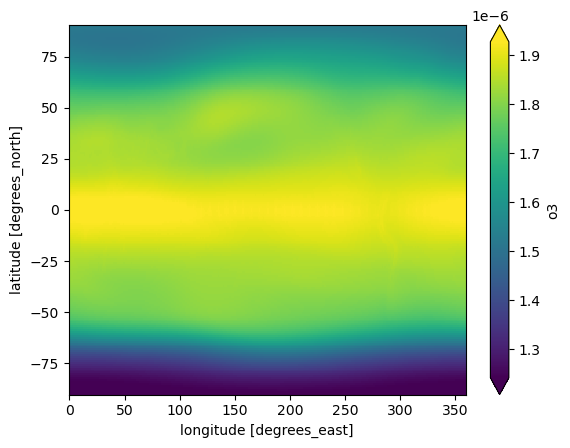

In [48]:
ozone_data['o3'].mean('lev').mean('time').plot(robust = True)

In [52]:
yearly_ozone_concentration = ozone_data['o3'].mean('lev').resample(time="1YS").mean('time').mean('lat').mean('lon')

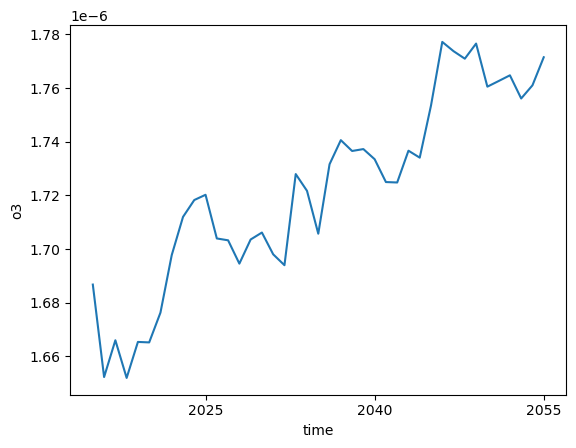

In [53]:
yearly_ozone_concentration.plot()

In [55]:
yearly_ozone_concentration

<xarray.DataArray 'o3' (time: 41)>
dask.array<mean_agg-aggregate, shape=(41,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2015-01-01 00:00:00 ... 2055-01-01 00:00:00

In [56]:
yearly_ozone_concentration_data =  pd.DataFrame({'ozone': yearly_ozone_concentration},
                    index=pd.date_range("1/1/2015", periods=41, freq='Y'))

In [57]:
result_path = '/work/bd1063/b309253/rd2_base_exploration/'
yearly_ozone_concentration_data.to_csv(result_path+"yearly_average_mole_fraction.csv")